In [4]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
text_color = 'black'
rcParams['text.color'] = text_color
rcParams['axes.labelcolor'] = text_color
rcParams['xtick.color'] = text_color
rcParams['ytick.color'] = text_color
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=26)  # fontsize of the figure title

root_path = "C:"
figure_dir = os.path.join(root_path, 'figures')
results_dir = os.path.join(root_path, 'results')
sim_parameters = pd.read_csv('simulation_parameters.csv', index_col=0)


In [5]:
def extract_results(path, pop, stim=True, integral=True):
       
    events = pd.read_csv(os.path.join(path,'events_pop_'+pop+'.csv'))
    frequency = pd.read_csv(os.path.join(path,'frequency.csv'))
    stimuli = pd.read_csv(os.path.join(path,'stimuli.csv'))

    evs = events['ID neuron pop_'+pop].to_numpy()
    ts = events['event time pop_'+pop].to_numpy()
    t = frequency['time'].to_numpy()
    activity = frequency['activity (Hz) pop_'+pop].to_numpy()
    if stim:
        stimulus = stimuli['stimulus pop '+pop].to_numpy()
    else:
        stimulus = False   
    if integral:
        sum_stimulus = stimuli['integral stim pop '+pop].to_numpy()
    else:       
        sum_stimulus = False


    return evs, ts, t, activity, stimulus, sum_stimulus

## Figure 1 
#### Raster plot and Activity plot
Comparison of the standard behaviour of the network at 0.0%, 12.8% and 51.2% stimulus coherence

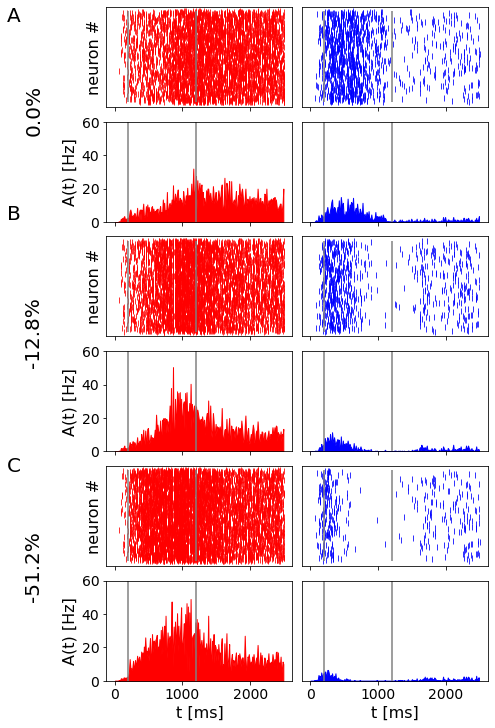

In [62]:
show=False

sim_type = 'standard'
start_stim = sim_parameters[sim_type]['start_stim']
end_stim = sim_parameters[sim_type]['end_stim']
results_dir_standard = os.path.join(results_dir,sim_type)

fig1,axes = plt.subplots(6, 2, figsize=(6,10),sharex=True,constrained_layout=True)

mult_coherence = [0.0,-0.128,-0.512]

trial = [158,159,1]

for i, coherence in enumerate(mult_coherence):
    j = trial[i]
    path = os.path.join(results_dir_standard,'c'+str(coherence),'trial_'+ str(j))

    evsA, tsA, t, A_N_A, stimulus_A, sum_stimulus_A = extract_results(path, 'A')
    evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
    
    axes[2*i][0].scatter(tsA, evsA,marker = '|', linewidths = 0.8, color='red', label ='pop A')
    axes[2*i][0].set_ylabel("neuron #")
    axes[2*i][0].vlines(start_stim, 0, 800, color='grey')
    axes[2*i][0].vlines(end_stim, 0, 800, color='grey')
    axes[2*i][0].set_yticks([]) 
    axes[2*i+1][0].fill_between(t, A_N_A, color='red')
    axes[2*i+1][0].vlines(start_stim, 0, 60, color='grey')
    axes[2*i+1][0].vlines(end_stim, 0, 60, color='grey')
    axes[2*i+1][0].set_ylabel("A(t) [Hz]")
    axes[2*i+1][0].set_ylim(0,60)

    axes[2*i][1].scatter(tsB, evsB,marker= '|',  linewidths = 0.8,color='blue', label ='pop B')
    axes[2*i][1].vlines(start_stim, 800, 1600, color='grey')
    axes[2*i][1].vlines(end_stim, 800, 1600, color='grey')
    axes[2*i][1].set_yticks([]) 
    axes[2*i+1][1].fill_between(t, B_N_B, color='blue')
    axes[2*i+1][1].vlines(start_stim, 0, 60, color='grey')
    axes[2*i+1][1].vlines(end_stim, 0, 60, color='grey')
    axes[2*i+1][1].set_ylim(0,60)
    axes[2*i+1][1].set_yticks([])

axes[5][0].set_xlabel("t [ms]")
axes[5][1].set_xlabel("t [ms]")

fig1.text(-0.12,0.975,'A')
fig1.text(-0.12,0.7,'B')
fig1.text(-0.12,0.35,'C')
fig1.text(-0.08,0.8225,'0.0%', rotation='vertical')
fig1.text(-0.08,0.5,'-12.8%',rotation='vertical')
fig1.text(-0.08,0.175,'-51.2%',rotation='vertical')

fig1.savefig(os.path.join(figure_dir,'standard_c3.eps'), bbox_inches='tight')

if show:
    plt.show()


## Figure 2
### Activity of inhibitory cell
2a. Comparison of the inhibitory activty at 0.0%, 12.8% and 51.2% stimulus coherence\
2b. Decision space at 0.0%, 12.8% and 51.2% stimulus coherence

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


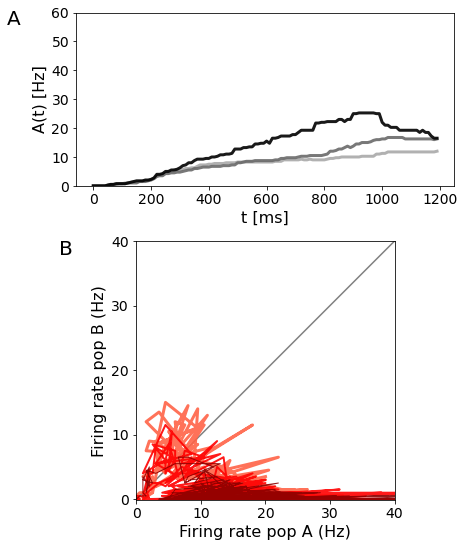

In [60]:
show=False

sim_parameters = pd.read_csv('simulation_parameters.csv', index_col=0)
sim_type = 'standard'
start_stim = sim_parameters[sim_type]['start_stim']
end_stim = sim_parameters[sim_type]['end_stim']
results_dir_standard = os.path.join(results_dir,sim_type)


fig2,axes = plt.subplots(2, 1,  figsize=(6,8),constrained_layout=True)

mult_coherence = [0.0,-0.128,-0.512]
color_A= ['tomato','r','darkred']
color_inh = ['darkgrey','dimgrey','k']

trial = trial = [158,159,1]#[11,19,16]

axes[1].plot([0,40],[0,40], color='grey')
for i, coherence in enumerate(mult_coherence):
    j = trial[i]
    path = os.path.join(results_dir_standard,'c'+str(coherence),'trial_'+ str(j))
    evsA, tsA, t, A_N_A, stimulus_A, sum_stimulus_A = extract_results(path, 'A')
    evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
    evsIn, tsIn, t, I_N_I, stimulus_A, sum_stimulus_A = extract_results(path, 'inh',stim=False, integral=False)
    I_N_I=signal.medfilt(I_N_I,55) 
    axes[0].plot(t[:120], I_N_I[:120], color=color_inh[i],alpha= 0.9, linewidth=3,label ='c '+str(coherence*100)+'%')
    axes[1].plot(A_N_A,B_N_B,color=color_A[i], alpha= 0.9, linewidth=3-i,label ='c '+str(coherence*100)+'%')

axes[0].set_ylabel("A(t) [Hz]")
axes[0].set_xlabel("t [ms]")
axes[0].set_aspect(10)
axes[0].set_ylim(0,60)
axes[1].set_xlim(-0.1,40)
axes[1].set_ylim(-0.1,40)
axes[1].set_aspect(1)
axes[1].set_xticks([0,10,20,30,40])
axes[1].set_yticks([0,10,20,30,40])
axes[1].set_xlabel("Firing rate pop A (Hz)")
axes[1].set_ylabel("Firing rate pop B (Hz)")   

fig2.text(-0.05,0.9,'A')
fig2.text(0.07,0.5,'B')
fig2.savefig(os.path.join(figure_dir,'decision_space.eps'), bbox_inches='tight')

if show:
    plt.show()

## Figure 3

#### Effect of recurrent excitatory connection and NMDA slow dynamic
3a. Comparison of the activity at 0.0% and 51.2% when the recurrent weight are no_NMDAd\
3b. Comparison of the activity at 0.0% and 51.2% when the tua_syn of NMDA receptor is equal to 2 ms (as AMPA)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

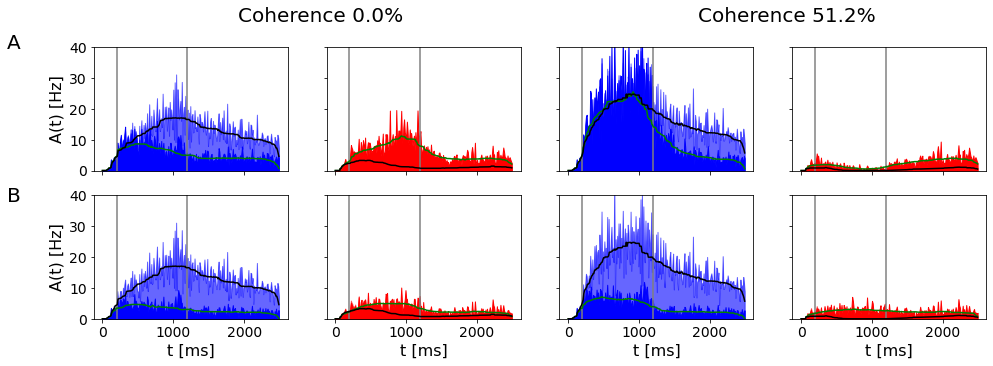

In [55]:
show=True
#REMEMBER TO DELETE FILE results/no_NMDA/c0.0/delta_s_B_winner.csv AND OTHERS
sim_parameters = pd.read_csv('simulation_parameters.csv', index_col=0)
sim_type = 'standard'
start_stim = sim_parameters[sim_type]['start_stim']
end_stim = sim_parameters[sim_type]['end_stim']

fig3, axes = plt.subplots(2, 4, sharey=True, sharex=True,  figsize=(16,5))

mult_coherence = [0.0, 0.512]

for i, coherence in enumerate(mult_coherence):
    sim_type = 'standard'
    path_standard = os.path.join(results_dir,sim_type,'c'+str(coherence))
    trial_winner = pd.read_csv(os.path.join(path_standard,'trial_winner.csv'))
    trial_B_win = trial_winner['trial'][trial_winner['winner']=='B'].to_numpy()
    A_N_A_mean =[]
    B_N_B_mean =[]
    for j in trial_B_win:
        path = os.path.join(path_standard,'trial_'+str(j))
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
        B_N_B_mean.append(B_N_B)
        evsA, tsA, t, A_N_A, stimulus_A, sum_stimulus_A = extract_results(path, 'A')
        A_N_A_mean.append(A_N_A)     
    B_N_B_mean = np.mean(B_N_B_mean,axis=0)
    B_N_B_smooth=signal.medfilt(B_N_B_mean,55) 
    A_N_A_mean = np.mean(A_N_A_mean,axis=0)
    A_N_A_smooth=signal.medfilt(A_N_A_mean,55) 

    sim_type = 'decrease'
    path_decrease = os.path.join(results_dir,sim_type,'c'+str(coherence))
    A_N_A_mean_decrease =[]
    B_N_B_mean_decrease =[]
    for path in os.listdir(path_decrease):
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(os.path.join(path_decrease,path), 'B')
        B_N_B_mean_decrease.append(B_N_B)
        evsA, tsA, t, A_N_A, stimulus_A, sum_stimulus_A = extract_results(os.path.join(path_decrease,path), 'A')
        A_N_A_mean_decrease.append(A_N_A)
    B_N_B_mean_decrease = np.mean(B_N_B_mean_decrease,axis=0)
    B_N_B_smooth_decrease=signal.medfilt(B_N_B_mean_decrease,55)
    A_N_A_mean_decrease = np.mean(A_N_A_mean_decrease,axis=0)
    A_N_A_smooth_decrease=signal.medfilt(A_N_A_mean_decrease,55) 

    sim_type = 'no_NMDA'
    path_no_NMDA = os.path.join(results_dir,sim_type,'c'+str(coherence))
    A_N_A_mean_no_NMDA =[]
    B_N_B_mean_no_NMDA =[]
    for path in os.listdir(path_no_NMDA):
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(os.path.join(path_no_NMDA,path), 'B')
        B_N_B_mean_no_NMDA.append(B_N_B)
        evsA, tsA, t, A_N_A, stimulus_A, sum_stimulus_A = extract_results(os.path.join(path_no_NMDA,path), 'A')
        A_N_A_mean_no_NMDA.append(A_N_A)
    B_N_B_mean_no_NMDA = np.mean(B_N_B_mean_no_NMDA,axis=0)
    B_N_B_smooth_no_NMDA=signal.medfilt(B_N_B_mean_no_NMDA,55)
    A_N_A_mean_no_NMDA = np.mean(A_N_A_mean_no_NMDA,axis=0)
    A_N_A_smooth_no_NMDA=signal.medfilt(A_N_A_mean_no_NMDA,55) 

    axes[0][i*2].fill_between(t,B_N_B_mean_decrease,color = 'blue')
    axes[0][i*2].fill_between(t,B_N_B_mean,color = 'blue',alpha=0.6)    
    axes[0][i*2].plot(t,B_N_B_smooth_decrease,'green')
    axes[0][i*2].plot(t,B_N_B_smooth,'black')
    axes[0][i*2].set_ylim(0,40)
    axes[0][i*2].vlines(start_stim, 0, 40, color='grey')
    axes[0][i*2].vlines(end_stim, 0, 40, color='grey')
    axes[0][i*2+1].fill_between(t,A_N_A_mean_decrease,color='red')
    axes[0][i*2+1].fill_between(t,A_N_A_mean,color='red',alpha=0.6)
    axes[0][i*2+1].plot(t,A_N_A_smooth_decrease,'green')
    axes[0][i*2+1].plot(t,A_N_A_smooth,'black')
    axes[0][i*2+1].set_ylim(0,40)
    axes[0][i*2+1].vlines(start_stim, 0, 40, color='grey')
    axes[0][i*2+1].vlines(end_stim, 0, 40, color='grey')

    axes[1][i*2].fill_between(t,B_N_B_mean_no_NMDA,color='blue')
    axes[1][i*2].fill_between(t,B_N_B_mean,color='blue',alpha=0.6)
    axes[1][i*2].plot(t,B_N_B_smooth_no_NMDA,'green')
    axes[1][i*2].plot(t,B_N_B_smooth,'black')
    axes[1][i*2].set_ylim(0,40)
    axes[1][i*2].vlines(start_stim, 0, 40, color='grey')
    axes[1][i*2].vlines(end_stim, 0, 40, color='grey')
    axes[1][i*2+1].fill_between(t,A_N_A_mean_no_NMDA,color='red')
    axes[1][i*2+1].fill_between(t,A_N_A_mean,color='red',alpha=0.6)    
    axes[1][i*2+1].plot(t,A_N_A_smooth_no_NMDA,'green')
    axes[1][i*2+1].plot(t,A_N_A_smooth,'black')
    axes[1][i*2+1].set_ylim(0,40)
    axes[1][i*2+1].vlines(start_stim, 0, 40, color='grey')
    axes[1][i*2+1].vlines(end_stim, 0, 40, color='grey')
        
    axes[1][0].set_xlabel("t [ms]")
    axes[1][1].set_xlabel("t [ms]")
    axes[1][2].set_xlabel("t [ms]")
    axes[1][3].set_xlabel("t [ms]")
    axes[0][0].set_ylabel("A(t) [Hz]")
    axes[1][0].set_ylabel("A(t) [Hz]")
    
fig3.text(0.05,0.875,'A')
fig3.text(0.05,0.45,'B')
fig3.text(0.25,0.95,'Coherence 0.0%')
fig3.text(0.65,0.95,'Coherence 51.2%')
fig3.savefig(os.path.join(figure_dir,'rec_NMDA.eps') , bbox_inches='tight')

if show:
    plt.show()

## Figure 4
Coin toss symmetry: behaviour of the network at 0.0% coherence

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

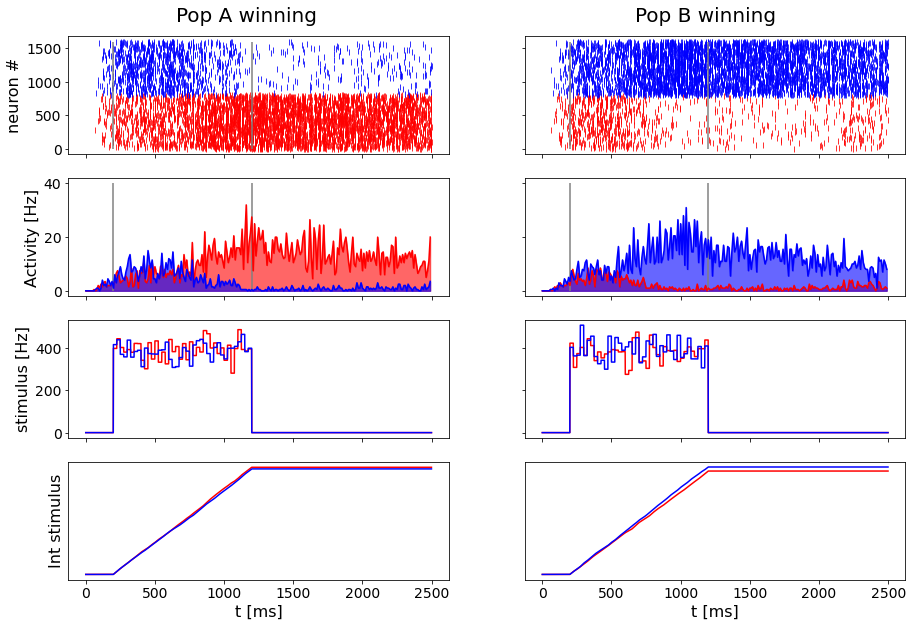

In [17]:
show=False

sim_parameters = pd.read_csv('simulation_parameters.csv', index_col=0)
sim_type = 'standard'
start_stim = sim_parameters[sim_type]['start_stim']
end_stim = sim_parameters[sim_type]['end_stim']
simtime = sim_parameters[sim_type]['simtime']

results_dir_standard = os.path.join(results_dir,sim_type)

fig4, axes = plt.subplots(4, 2, sharex=True, sharey='row', figsize=(15,10))

coherence = 0.0
trials = [158,38]#[11,52]
i=0
for j in trials:
    path = os.path.join(results_dir_standard,'c'+str(coherence),'trial_'+ str(j))
    evsA, tsA, t, A_N_A, stimulus_A, sum_stimulus_A = extract_results(path, 'A')
    evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')

    axes[0][i].scatter(tsA, evsA,marker = '|', linewidths = 0.8, color='red', label ='pop A')
    axes[0][i].scatter(tsB, evsB,marker = '|', linewidths = 0.8, color='blue', label ='pop B')
    axes[0][i].vlines(start_stim, 0, 1600, color='grey')
    axes[0][i].vlines(end_stim, 0, 1600, color='grey')

    axes[1][i].plot(t, A_N_A, color='red', label ='pop A')
    axes[1][i].fill_between(t, A_N_A, color='red', alpha = 0.6)
    axes[1][i].plot(t, B_N_B, color='blue', label ='pop B')
    axes[1][i].fill_between(t, B_N_B, color='blue', alpha = 0.6)
    axes[1][i].vlines(start_stim, 0, 40, color='grey')
    axes[1][i].vlines(end_stim, 0, 40, color='grey')

    axes[2][i].plot(np.arange(0., simtime),stimulus_A, 'red', label='stimulus on A')
    axes[2][i].plot(np.arange(0., simtime),stimulus_B, 'blue', label='stimulus on B')

    axes[3][i].plot(np.arange(0., simtime),sum_stimulus_A, 'red', label='sum_stimulus on A')
    axes[3][i].plot(np.arange(0., simtime),sum_stimulus_B, 'blue', label='sum_stimulus on B')
    axes[3][i].set_yticks([])
    axes[3][i].set_xlabel("t [ms]")
    i=i+1

axes[0][0].set_ylabel("neuron #")
axes[1][0].set_ylabel("Activity [Hz]")
axes[2][0].set_ylabel("stimulus [Hz]")
axes[3][0].set_ylabel("Int stimulus")
fig4.text(0.225,0.9,'Pop A winning')
fig4.text(0.65,0.9,'Pop B winning')
fig4.savefig(os.path.join(figure_dir,'coin_toss.eps') , bbox_inches='tight')

if show:
    plt.show()

## Figure 5
Performance of the network\
5a. Percentage of correct choice\
5b. Reaction time in correct/wrong choice\
5c. Reaction time on activity plot\Counts on reaction times

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


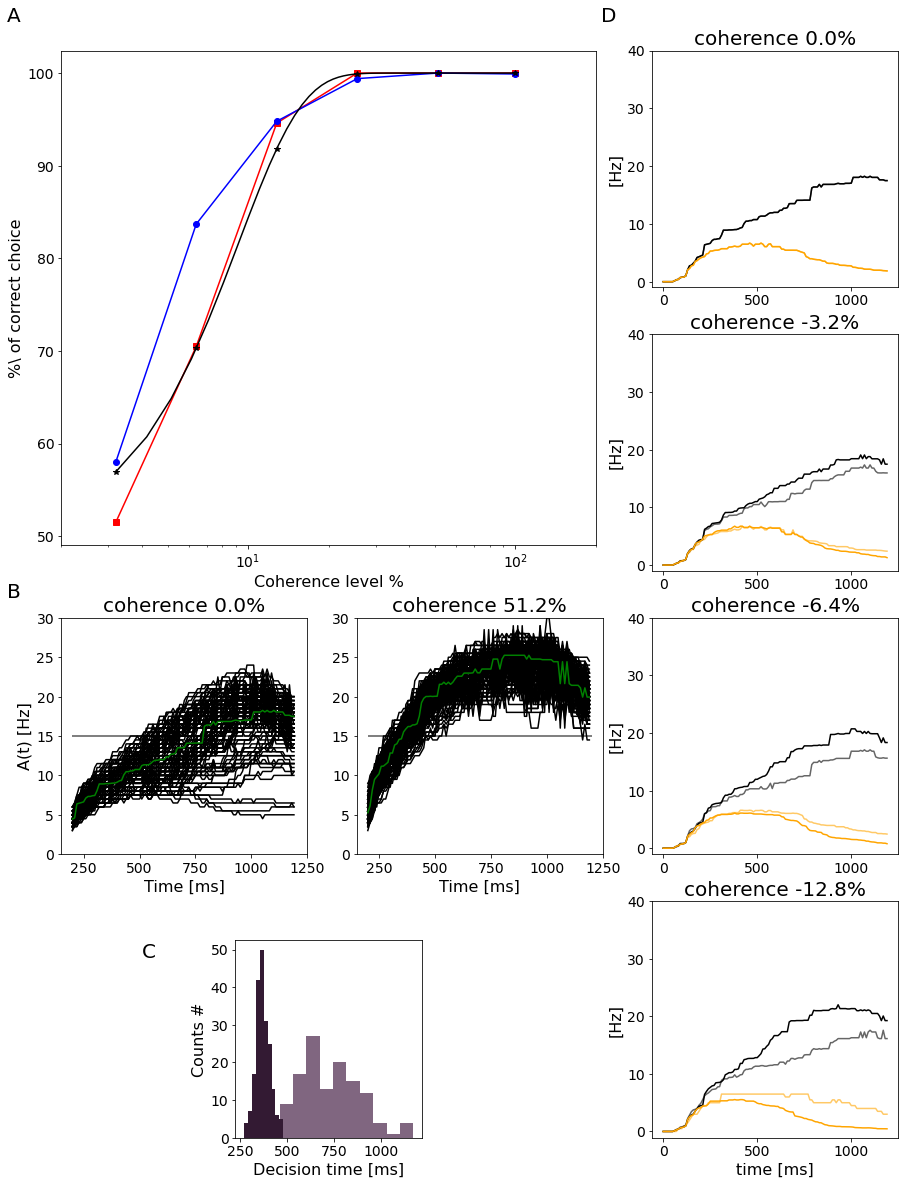

In [25]:
show=False
sim_type = 'standard'
results_dir_standard = os.path.join(results_dir,sim_type)
start_stim = sim_parameters[sim_type]['start_stim']
end_stim = sim_parameters[sim_type]['end_stim']
simtime = sim_parameters[sim_type]['simtime']
dt_rec = sim_parameters[sim_type]['dt_rec']

def weib(c,alpha,beta):
    return 1-0.5*np.exp(-(c/alpha)**beta)

fig5, axes = plt.subplots(4,3,figsize=(15,20))
axes[0,0].remove()
axes[1,0].remove()
axes[0,1].remove()
axes[1,1].remove()
gs1 = fig5.add_gridspec(nrows=4, ncols=3,wspace=0.3,hspace=0.5)
ax1 = fig5.add_subplot(gs1[0:2,0:2])
axes[3,0].remove()
axes[3,1].remove()
ax2 = fig5.add_subplot(gs1[3,0:2])

#########################################################################################
n_trial = 1000
winner = pd.read_csv(os.path.join(results_dir_standard,'1000_winners.csv'))
percentage_B_win = 100*(winner['pop B win'].to_numpy()[:6])/n_trial
percentage_A_win = 100*(winner['pop A win'].to_numpy()[8:])/n_trial

'''
percentage_B_win=[]
mult_coherence = [0.032,0.064,0.128,0.256,0.512]
for i, coherence in enumerate(mult_coherence):
    path_standard = results_dir+'/c'+str(coherence)
    trial_winner = pd.read_csv(path_standard+'/trial_winner.csv')
    trial_B_win = trial_winner['trial'][trial_winner['winner']=='B'].to_numpy()
    percentage_B_win.append((len(trial_B_win)/n_trial)*100)

percentage_A_win=[]
mult_coherence = [-0.032,-0.064,-0.128,-0.256,-0.512]
for i, coherence in enumerate(mult_coherence):
    path_standard = results_dir+'/c'+str(coherence)
    trial_winner = pd.read_csv(path_standard+'/trial_winner.csv')
    trial_A_win = trial_winner['trial'][trial_winner['winner']=='A'].to_numpy()
    percentage_A_win.append((len(trial_A_win)/n_trial)*100)
    '''

coherence_level = np.array([3.2,6.4,12.8,25.6,51.2,100.])
c=np.linspace(3.2,100.,100)
fit_weibul=weib(c,9.2,1.8)
point_weibul=weib(coherence_level,9.2,1.8)
ax1.semilogx(coherence_level,percentage_A_win,'s-', color='red')
ax1.semilogx(coherence_level,percentage_B_win,'o-', color='blue')
ax1.semilogx(c,fit_weibul*100,color='black')
ax1.semilogx(coherence_level,point_weibul*100,'*',color='black')
ax1.set_xlim(2*1e0, 2*1e2)
ax1.set_xlabel('Coherence level %')
ax1.set_ylabel('%\ of correct choice')
#########################################################################################
coherence_level = [0.0, 0.032, 0.064, 0.128]
n_trial = 200
for i,coherence in enumerate(coherence_level):

    path_standard =os.path.join(results_dir_standard,'c'+str(coherence))
    trial_winner = pd.read_csv(os.path.join(path_standard,'trial_winner.csv'))
    trial_B_win = trial_winner['trial'][trial_winner['winner']=='B'].to_numpy()
    trial_A_win = trial_winner['trial'][trial_winner['winner']=='A'].to_numpy()

    mean_activity_wB_sB = []
    for j in trial_B_win: 
        path = os.path.join(path_standard,'trial_'+ str(j))
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
        mean_activity_wB_sB.append(B_N_B)

    mean_activity_wA_sB = []
    for j in trial_A_win: 
        path = os.path.join(path_standard,'trial_'+ str(j))
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
        mean_activity_wA_sB.append(B_N_B)
        
    mean_activity_wB_sB = np.mean(mean_activity_wB_sB,axis=0)
    mean_activity_wA_sB = np.mean(mean_activity_wA_sB,axis=0)
    mean_activity_wB_sB = signal.medfilt(mean_activity_wB_sB,35)
    mean_activity_wA_sB = signal.medfilt(mean_activity_wA_sB,35)
    
    axes[i][2].plot(t[0:120],mean_activity_wB_sB[0:120],'black')
    axes[i][2].plot(t[0:120],mean_activity_wA_sB[0:120],'orange',alpha=0.6)

coherence_level = [0.0, -0.032, -0.064, -0.128]

for i,coherence in enumerate(coherence_level):

    path_standard =os.path.join(results_dir_standard,'c'+str(coherence))
    trial_winner = pd.read_csv(os.path.join(path_standard,'trial_winner.csv'))
    trial_B_win = trial_winner['trial'][trial_winner['winner']=='B'].to_numpy()
    trial_A_win = trial_winner['trial'][trial_winner['winner']=='A'].to_numpy()

    mean_activity_wB_sA = []
    for j in trial_B_win: 
        path = os.path.join(path_standard,'trial_'+ str(j))
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
        mean_activity_wB_sA.append(B_N_B)


    mean_activity_wA_sA = []
    for j in trial_A_win: 
        path = os.path.join(path_standard,'trial_'+ str(j))
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
        mean_activity_wA_sA.append(B_N_B)
    
    mean_activity_wB_sA = np.mean(mean_activity_wB_sA,axis=0)
    mean_activity_wA_sA = np.mean(mean_activity_wA_sA,axis=0)
    mean_activity_wB_sA = signal.medfilt(mean_activity_wB_sA,35)
    mean_activity_wA_sA = signal.medfilt(mean_activity_wA_sA,35)
    
    axes[i][2].plot(t[0:120],mean_activity_wB_sA[0:120],'black', alpha=0.6)
    axes[i][2].plot(t[0:120],mean_activity_wA_sA[0:120],'orange')    
    axes[i][2].set_yticks([0,10,20,30,40])
    axes[i][2].set_title('coherence '+str(coherence*100)+'%')
    axes[i][2].set_ylabel('[Hz]')
    

axes[3][2].set_xlabel('time [ms]')
#########################################################################################
mult_coherence = [0.0,0.512]
thr_activity = 15
ind_start_stim = int(start_stim/dt_rec)
ind_end_stim = int(end_stim/dt_rec)
for i, coherence in enumerate(mult_coherence):
    path_standard = os.path.join(results_dir_standard,'c'+str(coherence))
    trial_winner = pd.read_csv(os.path.join(path_standard,'trial_winner.csv'))
    trial_B_win = trial_winner['trial'][trial_winner['winner']=='B'].to_numpy()
    B_N_B_mean = []
    decision_time = []
    for j in trial_B_win:
        path = os.path.join(path_standard,'trial_'+ str(j))
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
        B_N_B_mean.append(B_N_B)            
        B_N_B = signal.medfilt(B_N_B,35)  
        axes[2][i].plot(t[ind_start_stim:ind_end_stim], B_N_B[ind_start_stim:ind_end_stim], color='black', label ='pop B')
        axes[2][i].hlines(15, start_stim, end_stim, 'grey')
        axes[2][i].set_ylim(0,30)
        axes[2][i].set_xlabel("Time [ms]")
        axes[2][i].set_title('coherence '+str(coherence*100)+'%' )
        if len(t[B_N_B >= thr_activity])!=0:
            decision_time.append(t[B_N_B >= thr_activity][0]) 

    ax2.hist(decision_time, color = [0.5-i*0.3,0.4-i*0.3,0.5-i*0.3])
    ax2.set_xlabel('Decision time [ms]')
    ax2.set_ylabel('Counts #')
    ax2.set_aspect(20)

    B_N_B_mean = np.mean(B_N_B_mean,axis=0)
    B_N_B_mean = signal.medfilt(B_N_B_mean,35)
    axes[2][i].plot(t[ind_start_stim:ind_end_stim], B_N_B_mean[ind_start_stim:ind_end_stim], color='green', label ='pop B')

axes[2][0].set_ylabel("A(t) [Hz]")


fig5.text(0.075,0.9,'A')
fig5.text(0.075,0.5,'B')
fig5.text(0.2,0.25,'C')
fig5.text(0.625,0.9,'D')

fig5.savefig(os.path.join(figure_dir,'performance.eps'))

if show:
    plt.show()

In [ ]:
show=True
sim_type = 'standard'
start_stim = sim_parameters[sim_type]['start_stim']
end_stim = sim_parameters[sim_type]['end_stim']
simtime = sim_parameters[sim_type]['simtime']
dt_rec = sim_parameters[sim_type]['dt_rec']

results_dir_standard = os.path.join(results_dir,sim_type)

fig5b, axes = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(5,10))

coherence_level = [0.0, 0.032, 0.064, 0.128]
n_trial = 200
for i,coherence in enumerate(coherence_level):

    path_standard =os.path.join(results_dir_standard,'c'+str(coherence))
    trial_winner = pd.read_csv(os.path.join(path_standard,'trial_winner.csv'))
    trial_B_win = trial_winner['trial'][trial_winner['winner']=='B'].to_numpy()
    trial_A_win = trial_winner['trial'][trial_winner['winner']=='A'].to_numpy()

    mean_activity_wB_sB = []
    for j in trial_B_win: 
        path = os.path.join(path_standard,'trial_'+ str(j))
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
        mean_activity_wB_sB.append(B_N_B)

    mean_activity_wA_sB = []
    for j in trial_A_win: 
        path = os.path.join(path_standard,'trial_'+ str(j))
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
        mean_activity_wA_sB.append(B_N_B)
        
    mean_activity_wB_sB = np.mean(mean_activity_wB_sB,axis=0)
    mean_activity_wA_sB = np.mean(mean_activity_wA_sB,axis=0)
    mean_activity_wB_sB = signal.medfilt(mean_activity_wB_sB,35)
    mean_activity_wA_sB = signal.medfilt(mean_activity_wA_sB,35)
    
    axes[i].plot(t[0:120],mean_activity_wB_sB[0:120],'black')
    axes[i].plot(t[0:120],mean_activity_wA_sB[0:120],'orange',alpha=0.6)

coherence_level = [0.0, -0.032, -0.064, -0.128]

for i,coherence in enumerate(coherence_level):

    path_standard =os.path.join(results_dir_standard,'c'+str(coherence))
    trial_winner = pd.read_csv(os.path.join(path_standard,'trial_winner.csv'))
    trial_B_win = trial_winner['trial'][trial_winner['winner']=='B'].to_numpy()
    trial_A_win = trial_winner['trial'][trial_winner['winner']=='A'].to_numpy()

    mean_activity_wB_sA = []
    for j in trial_B_win: 
        path = os.path.join(path_standard,'trial_'+ str(j))
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
        mean_activity_wB_sA.append(B_N_B)


    mean_activity_wA_sA = []
    for j in trial_A_win: 
        path = os.path.join(path_standard,'trial_'+ str(j))
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
        mean_activity_wA_sA.append(B_N_B)
    
    mean_activity_wB_sA = np.mean(mean_activity_wB_sA,axis=0)
    mean_activity_wA_sA = np.mean(mean_activity_wA_sA,axis=0)
    mean_activity_wB_sA = signal.medfilt(mean_activity_wB_sA,35)
    mean_activity_wA_sA = signal.medfilt(mean_activity_wA_sA,35)
    
    axes[i].plot(t[0:120],mean_activity_wB_sA[0:120],'black', alpha=0.6)
    axes[i].plot(t[0:120],mean_activity_wA_sA[0:120],'orange')    
    axes[i].set_yticks([0,10,20,30,40])
    axes[i].set_title('coherence '+str(coherence*100)+'%')
    axes[i].set_ylabel('Decision slope [Hz]')

axes[3].set_xlabel('time [ms]')
fig5b.savefig(os.path.join(figure_dir,'Figure5b.png'))

if show:
    plt.show()

In [ ]:
show=True
sim_type = 'standard'
start_stim = sim_parameters[sim_type]['start_stim']
end_stim = sim_parameters[sim_type]['end_stim']
simtime = sim_parameters[sim_type]['simtime']
dt_rec = sim_parameters[sim_type]['dt_rec']

results_dir_standard = os.path.join(results_dir,sim_type)

fig5c,axes = plt.subplots(2, 2, sharex=True,sharey=True, figsize=(6,5))
axes[1,0].remove()
axes[1,1].remove()
gs1 = fig5c.add_gridspec(nrows=2, ncols=2, left=0.3, right=0.7)
ax2=fig5c.add_subplot(gs1[-1,:])


mult_coherence = [0.0,0.512]
thr_activity = 15
ind_start_stim = int(start_stim/dt_rec)
ind_end_stim = int(end_stim/dt_rec)
for i, coherence in enumerate(mult_coherence):
    path_standard = os.path.join(results_dir_standard,'c'+str(coherence))
    trial_winner = pd.read_csv(os.path.join(path_standard,'trial_winner.csv'))
    trial_B_win = trial_winner['trial'][trial_winner['winner']=='B'].to_numpy()
    B_N_B_mean = []
    decision_time = []
    for j in trial_B_win:
        path = os.path.join(path_standard,'trial_'+ str(j))
        evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B')
        B_N_B_mean.append(B_N_B)            
        B_N_B = signal.medfilt(B_N_B,35)  
        axes[0][i].plot(t[ind_start_stim:ind_end_stim], B_N_B[ind_start_stim:ind_end_stim], color='black', label ='pop B')
        axes[0][i].hlines(15, start_stim, end_stim, 'grey')
        axes[0][i].set_ylim(0,30)
        axes[0][i].set_xlabel("Time [ms]")
        axes[0][i].set_title('coherence '+str(coherence*100)+'%' )
        if len(t[B_N_B >= thr_activity])!=0:
            decision_time.append(t[B_N_B >= thr_activity][0]) 

    ax2.hist(decision_time, color = [0.5-i*0.3,0.4-i*0.3,0.5-i*0.3])
    ax2.set_xlabel('Decision time [ms]')
    ax2.set_ylabel('Counts #')

    B_N_B_mean = np.mean(B_N_B_mean,axis=0)
    B_N_B_mean = signal.medfilt(B_N_B_mean,35)
    axes[0][i].plot(t[ind_start_stim:ind_end_stim], B_N_B_mean[ind_start_stim:ind_end_stim], color='green', label ='pop B')

axes[0][0].set_ylabel("A(t) [Hz]")

fig5c.savefig(os.path.join(figure_dir,'Figure5c.png'))

if show:
    plt.show()

## Figure 6
Effect of stimulus duration\
6a. Network performace at different stimulus duration\
6b. Compare network activity at 3 different stiulus duration

<ipython-input-53-fc062dbb22d7>:87: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig6.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does

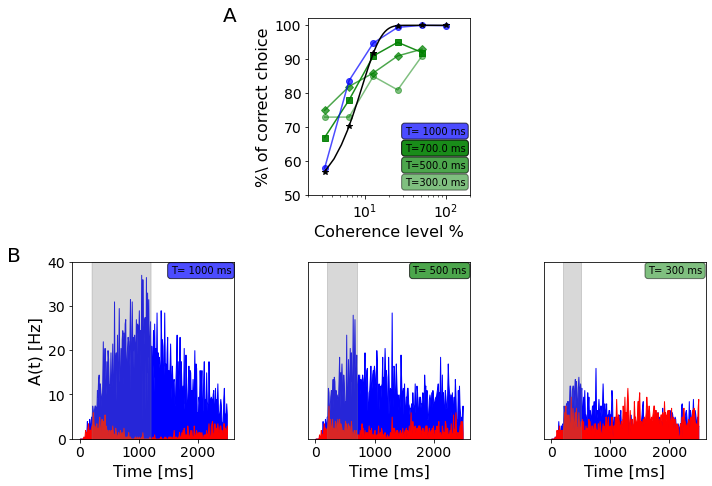

In [53]:
show=False

sim_parameters = pd.read_csv('simulation_parameters.csv', index_col=0)

sim_type = 'stim_duration'
results_dir_stim_duration = os.path.join(results_dir,sim_type)
end_stim = [500.0, 700.0, 900.0]

sim_type = 'standard'
results_dir_standard =os.path.join(results_dir,sim_type)
simtime = sim_parameters[sim_type]['simtime']
start_stim = sim_parameters[sim_type]['start_stim']

fig6,axes = plt.subplots(2, 3,  figsize=(10,7),constrained_layout=True)

axes[0][0].remove()
axes[0][2].remove()

def weib(c,alpha,beta):
    return 1-0.5*np.exp(-(c/alpha)**beta)

marker=['o','D','s','X','^']
coherence_level = np.array([3.2,6.4,12.8,25.6,51.2])
n_trial = 100
c = ['g','limegreen','lime']
y = [53,58,63]
for n,d in enumerate(end_stim):
    percentage_B_win=[]
    mult_coherence = [0.032,0.064,0.128,0.256,0.512]   

    for i, coherence in enumerate(mult_coherence):
        path = os.path.join(results_dir_stim_duration,'stim_end_'+str(d),'c'+str(coherence))
        trial_winner = pd.read_csv(os.path.join(path,'trial_winner.csv'))
        trial_B_win = trial_winner[trial_winner['winner']=='B'].to_numpy()
        percentage_B_win.append((len(trial_B_win)/n_trial)*100)

    axes[0][1].semilogx(coherence_level,percentage_B_win,marker=marker[n], color='green', alpha = 0.5+0.2*n, label = 'T='+str(d)+' ms')
    axes[0][1].set_xlabel('Coherence level %')
    axes[0][1].set_ylabel('%\ of correct choice')
    axes[0][1].text(coherence_level[-1]-20, y[n], 'T='+str(d-200)+' ms',size=10,bbox=dict(boxstyle="round", fc='green', alpha = 0.5+0.2*n))


n_trial = 1000
winner = pd.read_csv(os.path.join(results_dir_standard,'1000_winners.csv'))
percentage_B_win = 100*(winner['pop B win'].to_numpy()[0:6])/n_trial
coherence_level = np.array([3.2,6.4,12.8,25.6,51.2,100.])
c=np.linspace(3.2,100.,100)
fit_weibul=weib(c,9.2,1.8)
point_weibul=weib(coherence_level,9.2,1.8)

axes[0][1].semilogx(coherence_level,percentage_B_win,'o-', color='blue', alpha = 0.7,label = 'T=1000 ms')
axes[0][1].semilogx(c,fit_weibul*100,color='black')
axes[0][1].semilogx(coherence_level,point_weibul*100,'*',color='black')
axes[0][1].set_xlim(2*1e0, 2*1e2)
axes[0][1].set_xlabel('Coherence level %')
axes[0][1].set_ylabel('%\ of correct choice')
axes[0][1].set_yticks([50,60,70,80,90,100])
axes[0][1].text(coherence_level[-2]-20, 68, 'T= 1000 ms',size=10,bbox=dict(boxstyle="round", fc= 'blue', alpha = 0.7))


#########################################################################################
trials = [49,43,70]
coherence = 0.128
simuluations = ['standard', 'stim_duration\\stim_end_700.0','stim_duration\\stim_end_500.0' ]
end_stim = [1200.0, 700.0, 500.0]

for i,s in enumerate(simuluations):
    path = os.path.join(results_dir,s,'c'+str(coherence),'trial_'+ str(trials[i]))
    evsA, tsA, t, A_N_A, stimulus_A, sum_stimulus_A = extract_results(path, 'A', integral=False)
    evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B', integral=False)

    axes[1][i].fill_between(t, B_N_B, color='blue', label ='pop B')
    axes[1][i].fill_between(t, A_N_A, color='red', label ='pop A')
    axes[1][i].tick_params(axis='y')
    axes[1][i].set_ylim(0,40)
    axes[1][i].set_yticks([])
    axes[1][i].fill_between(np.arange(start_stim, end_stim[i]),np.ones((int(end_stim[i]-start_stim)))*40, color = 'grey', alpha=0.3)
    axes[1][i].set_xlabel("Time [ms]")

axes[1][0].set_yticks([0,10,20,30,40])
axes[1][0].set_ylabel("A(t) [Hz]")
fig6.text(0.3,0.95,'A')
fig6.text(0,0.475,'B')
fig6.text(0.227, 0.45, 'T= 1000 ms',size=10,bbox=dict(boxstyle="round", fc= 'blue', alpha = 0.7))
fig6.text(0.563, 0.45, 'T= 500 ms',size=10,bbox=dict(boxstyle="round", fc= 'green', alpha = 0.7))
fig6.text(0.89, 0.45, 'T= 300 ms',size=10,bbox=dict(boxstyle="round", fc= 'green', alpha = 0.5))
fig6.tight_layout()
fig6.savefig(os.path.join(figure_dir,'stim_dur.eps') , bbox_inches='tight')

if show:
    plt.show()

## Figure 7

In [ ]:
show=False

sim_parameters = pd.read_csv('simulation_parameters.csv', index_col=0)
sim_type = 't_reverse'
results_dir_t_reverse = os.path.join(results_dir,sim_type)
t_rev = [300.0,500.0,700.0,900.0,1000.0]

sim_type = 'stim_reverse'
results_dir_stim_reverse = os.path.join(results_dir,sim_type)
stim_reverse = [-0.032,-0.064,-0.128,-0.256,-0.512,-0.7,-0.8,-1.0]

fig7,axes = plt.subplots(6, 3,  figsize=(10,15),constrained_layout=True)
axes[0][0].remove()
axes[0][2].remove()
axes[3][0].remove()
axes[3][2].remove()
#########################################################################################
n_trial = 100
marker=['o','D','s','X','^']
percentage_B_win=[]
percentage_A_win = []
for n,d in enumerate(t_rev):

    coherence = 0.128
    path = os.path.join(results_dir_t_reverse,'t_rev'+str(d),'c'+str(coherence))
    trial_winner = pd.read_csv(os.path.join(path,'trial_winner.csv'))
    trial_B_win = trial_winner[trial_winner['winner']=='B'].to_numpy()
    trial_A_win = trial_winner[trial_winner['winner']=='A'].to_numpy()
    percentage_B_win.append((len(trial_B_win)/n_trial)*100)
    percentage_A_win.append((len(trial_A_win)/n_trial)*100)

axes[0][1].plot(t_rev,percentage_B_win,marker=marker[n], color='blue', label = 'T='+str(d)+' ms')
axes[0][1].plot(t_rev,percentage_A_win,marker=marker[n], color='red', label = 'T='+str(d)+' ms')
axes[0][1].set_xlabel('Time Reverse [ms]')
axes[0][1].set_ylabel('%\ of choice')
#########################################################################################
trials = [0,0,0]
coherence = 0.128
simuluations = ['standard','t_reverse/t_rev1000.0','t_reverse/t_rev300.0' ]
sim_type = ['standard','t_reverse','t_reverse' ]

for i,s in enumerate(simuluations):
    simtime = sim_parameters[sim_type[i]]['simtime']
    path = os.path.join(results_dir,s,'c'+str(coherence),'trial_'+ str(trials[i]))
    evsA, tsA, t, A_N_A, stimulus_A, sum_stimulus_A = extract_results(path, 'A', integral=False)
    evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B', integral=False)
    axes[1][i].fill_between(t, B_N_B, color='blue',alpha=0.5)
    axes[1][i].fill_between(t, A_N_A, color='red', alpha=0.5)
    axes[1][i].set_ylim(0,40)
    axes[2][i].fill_between(np.arange(0., simtime),stimulus_A[:2500], color='red', alpha = 0.5,label='stimulus on A')
    axes[2][i].fill_between(np.arange(0., simtime),stimulus_B[:2500], color='blue', alpha = 0.5,label='stimulus on B')
    axes[2][i].set_ylim(0,800)
    axes[2][i].set_xlabel("t [ms]")
    axes[1][i].set_yticks([])
    axes[2][i].set_yticks([])
axes[1][0].set_yticks([0,10,20,30,40])
axes[2][0].set_yticks([0,500]) 
axes[1][0].set_ylabel("A(t) [Hz]")
axes[2][0].set_ylabel("Stimulus(t) [Hz]")

#########################################################################################
n_trial = 100
marker=['o','D','s','X','^']
percentage_B_win=[]
percentage_A_win = []
for n,d in enumerate(stim_reverse):

    coherence = 0.128
    path = os.path.join(results_dir_stim_reverse,'stim_rev'+str(d),'c'+str(coherence))
    trial_winner = pd.read_csv(os.path.join(path,'trial_winner.csv'))
    trial_B_win = trial_winner[trial_winner['winner']=='B'].to_numpy()
    trial_A_win = trial_winner[trial_winner['winner']=='A'].to_numpy()
    percentage_B_win.append((len(trial_B_win)/n_trial)*100)
    percentage_A_win.append((len(trial_A_win)/n_trial)*100)

axes[3][1].semilogx(np.abs(stim_reverse)*100,percentage_B_win,marker='o', color= 'blue', label = 'T='+str(d)+' ms')
axes[3][1].semilogx(np.abs(stim_reverse)*100,percentage_A_win,marker='s', color='red',label = 'T='+str(d)+' ms')
axes[3][1].set_xlabel('Coherence level %')
axes[3][1].set_ylabel('%\ of choice')
#########################################################################################
trials = [0,0,0]
coherence = 0.128
simuluations = ['standard', 'stim_reverse/stim_rev-0.128','stim_reverse/stim_rev-0.8' ]

for i,s in enumerate(simuluations):
    simtime = sim_parameters[sim_type[i]]['simtime']
    path = os.path.join(results_dir,s,'c'+str(coherence),'trial_'+ str(trials[i]))
    evsA, tsA, t, A_N_A, stimulus_A, sum_stimulus_A = extract_results(path, 'A', integral=False)
    evsB, tsB, t, B_N_B, stimulus_B, sum_stimulus_B = extract_results(path, 'B', integral=False)
    axes[4][i].fill_between(t, B_N_B, color='blue',alpha = 0.5)
    axes[4][i].fill_between(t, A_N_A, color='red',alpha = 0.5)
    axes[4][i].set_ylim(0,40)
    axes[5][i].fill_between(np.arange(0., simtime),stimulus_B[:2500], color='blue', alpha = 0.5,label='stimulus on B')
    axes[5][i].fill_between(np.arange(0., simtime),stimulus_A[:2500], color='red', alpha = 0.5,label='stimulus on A')
    axes[5][i].set_ylim(0,800)
    axes[5][i].set_xlabel("t [ms]")
    axes[4][i].set_yticks([])
    axes[5][i].set_yticks([])

axes[4][0].set_ylabel("A(t) [Hz]")
axes[5][0].set_ylabel("Stimulus(t) [Hz]")
axes[4][0].set_yticks([0,10,20,30,40])
axes[5][0].set_yticks([0,500])

fig7.text(-0.05,0.475,'B')
fig7.text(-0.05,0.975,'A')
fig7.savefig(os.path.join(figure_dir,'stim_rev.eps') , bbox_inches='tight')

if show:
    plt.show()